## Observations and Insights 

In [ ]:
# Observations:
    
# 1. If in absence of a z-factor, there appears to be a direct correlation between mouse weight and tumor volume.
# 
# 2. Capomulin and Ramiscane appear to be the most successful (lowest average tumor size) and are the drugs with the most prolific sample size, both across number of mice studied and length of timeframes, but they also have the lowest standard deviation in tumor size.
# 
# 3. Propiva have half as many samples as Capomulin or Ramiscane, but has more of a middle standard deviation and SEM, especially compared to Ketapril or Naftisol, which have a larger sample size but larger standard deviations.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "/Users/theluggage/matplotlib-challenge/Resources/Mouse_metadata.csv"
study_results_path = "/Users/theluggage/matplotlib-challenge/Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# mouse_metadata.info() - shows 249 records
# study_results.info() - shows 1893 records, but there are duplicate Mice ID in order to document each mouse's progress over mutiple timepoints.

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# # Checking the number of mice.

# unique_mice = merge_df["Mouse ID"].unique()
# unique_mice.describe()

# Grab the data contained within the "Mouse ID" row. Remove any duplicate Mice IDs. 
unique_mice = merge_df.drop_duplicates(subset='Mouse ID')

#Isolate the number of mice by 'Mouse ID', and get an integer of the count of the number of unique mice.
unique_mice_ID = unique_mice[["Mouse ID"]]
unique_mice_count = unique_mice_ID.count()[0]
unique_mice_count



249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
unique_mice_and_timepoint = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
unique_mice_and_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

just_g989_df = merge_df[merge_df["Mouse ID"].str.contains("g989")==True]
just_g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_clean_df = merge_df[merge_df["Mouse ID"].str.contains("g989")==False]
mice_clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

# Grab the data contained within the "Mouse ID" row. Remove any duplicate Mice IDs. 
unique_mice = merge_df.drop_duplicates(subset='Mouse ID')

#Isolate the number of mice by 'Mouse ID', and get an integer of the count of the number of unique mice.
unique_mice_ID = unique_mice[["Mouse ID"]]
unique_mice_count = unique_mice_ID.count()[0]
unique_mice_count


249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting _series_ into a single summary dataframe.


mice_gb_tumor_mean_df = mice_clean_df.groupby('Drug Regimen').mean()
mice_gb_tumor_mean_df_column =  mice_gb_tumor_mean_df['Tumor Volume (mm3)']

mice_gb_tumor_median_df = mice_clean_df.groupby('Drug Regimen').median()
mice_gb_tumor_median_df_column =  mice_gb_tumor_median_df['Tumor Volume (mm3)']

mice_gb_tumor_var_df = mice_clean_df.groupby('Drug Regimen').var()
mice_gb_tumor_var_df_column =  mice_gb_tumor_var_df['Tumor Volume (mm3)']

mice_gb_tumor_sd_df = mice_clean_df.groupby('Drug Regimen').std()
mice_gb_tumor_sd_df_column =  mice_gb_tumor_sd_df['Tumor Volume (mm3)']

mice_gb_tumor_sem_df = mice_clean_df.groupby('Drug Regimen').sem()
mice_gb_tumor_sem_df_column =  mice_gb_tumor_sem_df['Tumor Volume (mm3)']


# Create a data frame.

merged_mice_tumor_summ_stat = pd.DataFrame({
    "Mean": mice_gb_tumor_mean_df_column,
    "Median": mice_gb_tumor_median_df_column,
    "Vairance": mice_gb_tumor_var_df_column,
    "Standard Deviation": mice_gb_tumor_sd_df_column,
    "Standard Error of the Mean": mice_gb_tumor_sem_df_column
})

merged_mice_tumor_summ_stat

,Mean,Median,Vairance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

mice_summ_stat_df = mice_clean_df.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])
mice_summ_stat_df['Tumor Volume (mm3)']




,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

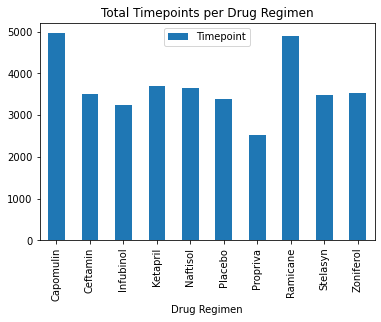

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#Use grouby to get the sum of each of the data per drug regimen.
mice_gb_timepoint_sum_df = mice_clean_df.groupby('Drug Regimen').sum()

#Isolate the Drug Regimen and Timepoint columns.
mice_gb_sum_reduced = mice_gb_timepoint_sum_df.drop(['Age_months', 'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites'], axis=1)
mice_gb_sum_reduced

#Plot the bar chart.
mice_gb_sum_reduced.plot(kind="bar")
plt.title("Total Timepoints per Drug Regimen")
plt.show()



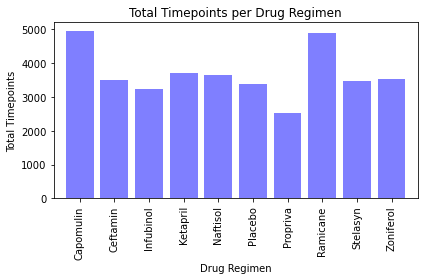

In [64]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#Reset the index.
mice_gb_sum_reduced_reset_index = mice_gb_sum_reduced.reset_index()

mice_gb_sum_reduced_reset_index



# # Set x axis and tick locations
x_axis = mice_gb_sum_reduced_reset_index['Drug Regimen']
y_axis = mice_gb_sum_reduced_reset_index['Timepoint']
# tick_locations = [value for value in x_axis]

plt.bar(mice_gb_sum_reduced_reset_index['Drug Regimen'], mice_gb_sum_reduced_reset_index['Timepoint'], color='b', alpha=0.5, align="center")
# # plt.xticks(rotation='vertical')
# # # Set x and y limits
plt.xlim(-0.75, len(mice_gb_sum_reduced_reset_index['Drug Regimen'])-.25)
plt.xticks(rotation='vertical')

# Set a Title and labels
plt.title("Total Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")
# # Save our graph and show the graph
plt.tight_layout()
plt.show()



<AxesSubplot:title={'center':'Gender of Mice (Male or Female)'}, ylabel='Mouse ID'>

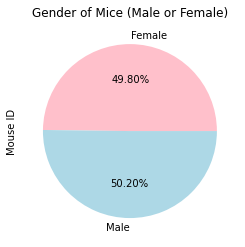

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Find the gender count of male mice vs female mice.
#Get a count of the number of unique mice per gender.
gender_count = unique_mice.value_counts('Sex')
gender_count

unique_mice.groupby(['Sex']).count()['Mouse ID'].plot(kind='pie', autopct='%.2f%%',
                                colors = ['pink', 'lightblue'],
                                title='Gender of Mice (Male or Female)')



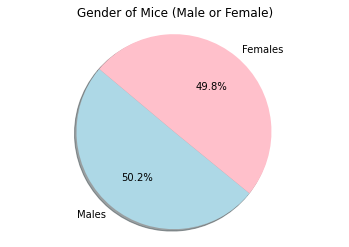

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



#Get a ratio for the number of unique mice per gender against the total number of unique mice.
ratio_df = gender_count/unique_mice_count

#Create a data frame.
gender_data_df = pd.DataFrame({
    "Total Count": gender_count,
    "Percentage of Each Gender": ratio_df*100
    
})

#Convert the percentage of players into percent format with two decimal places.
gender_data_df["Percentage of Each Gender"] = gender_data_df["Percentage of Each Gender"].map("{:.2f}%".format)

gender_data_df.head()

# Labels for the sections of our pie chart
labels = ["Males", "Females"]

# The values of each section of the pie chart
sizes = [.502, .498]

# The colors of each section of the pie chart
colors = ["lightblue", "pink"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0)
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.title('Gender of Mice (Male or Female)')
plt.show()


## Quartiles, Outliers and Boxplots

In [100]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


mf_capomulin = mice_clean_df['Drug Regimen'] == 'Capomulin'
mf_ramicane = mice_clean_df['Drug Regimen'] == 'Ramicane'
mf_infubinol = mice_clean_df['Drug Regimen'] == 'Infubinol'
mf_ceftamin = mice_clean_df['Drug Regimen'] == 'Ceftamin'


mice_four_drugs = mice_clean_df.loc[mf_capomulin | mf_ramicane | mf_infubinol | mf_ceftamin]
mice_four_drugs

mice_four_drugs_capomulin = mice_four_drugs_column.loc[mf_capomulin]
mice_four_drugs_ramicane = mice_four_drugs_column.loc[mf_ramicane]
mice_four_drugs_infubinol = mice_four_drugs_column.loc[mf_infubinol]
mice_four_drugs_ceftamin = mice_four_drugs_column.loc[mf_ceftamin]


#Isolate the Mouse ID and Tumor Columns in preparation for merging.
mice_four_drugs_column =  mice_four_drugs[['Mouse ID','Drug Regimen', 'Tumor Volume (mm3)', 'Timepoint']]


#Relabel the Tumor Column.
mice_four_drugs_column.columns = ['Mouse ID', 'Drug Regimen', 'Tumor Volume Largest (mm3)', 'Timepoint']
mice_four_drugs_column


# just_mouse_drugs = mice_four_drugs.columns = ['Mouse ID', 'Drug Regimen']
# just_mouse_drugs.drop_duplicates()

# Start by getting the last (greatest) timepoint for each mouse
# Get max value for each mouse.
max_tumor_df = mice_four_drugs_column.groupby('Mouse ID').max(['Timepoint']).reset_index()
max_tumor_df

max_tumor_capomulin_df = mice_four_drugs_capomulin.groupby('Mouse ID').max(['Timepoint']).reset_index()
max_tumor_ramicane_df = mice_four_drugs_ramicane.groupby('Mouse ID').max(['Timepoint']).reset_index()
max_tumor_infubinol_df = mice_four_drugs_infubinol.groupby('Mouse ID').max(['Timepoint']).reset_index()
max_tumor_ceftamin_df = mice_four_drugs_ceftamin.groupby('Mouse ID').max(['Timepoint']).reset_index()

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# max_tumor_merge_df = pd.merge(max_tumor_df, just_mouse_drugs, on="Mouse ID", how="inner")
# max_tumor_merge_df




In [97]:


# Put treatments into a list for for loop (and later for plot labels)
treatments = [Capomulin, Ramicane, Infubinol, Ceftamin]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = max_tumor_merge_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
temperature_df = pd.read_csv('../Resources/lax_temperature.csv')
temperatures = temperature_df['HourlyDryBulbTemperature']
    
# Example outlier plot of reaction times
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Size per Drug Regimen')
ax1.set_ylabel('Tumor Volume mm3')
ax1.boxplot(tumor_vol)
plt.show()
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

NameError: name 'Capomulin' is not defined

In [101]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

max_tumor_capomulin_df = mice_four_drugs_capomulin.groupby('Mouse ID').max(['Timepoint']).reset_index()
max_tumor_ramicane_df = mice_four_drugs_ramicane.groupby('Mouse ID').max(['Timepoint']).reset_index()
max_tumor_infubinol_df = mice_four_drugs_infubinol.groupby('Mouse ID').max(['Timepoint']).reset_index()
max_tumor_ceftamin_df = mice_four_drugs_ceftamin.groupby('Mouse ID').max(['Timepoint']).reset_index()

tumors_capomulin = max_tumor_capomulin_df['Tumor Volume (mm3)']
tumors_ramicane = max_tumor_ramicane_df['Tumor Volume (mm3)']
tumors_infubinol = max_tumor_infubinol_df['Tumor Volume (mm3)']
tumors_ceftamin = max_tumor_ceftamin_df['Tumor Volume (mm3)']

# Example outlier plot of reaction times
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Size per Drug Regimen (Capomulin)')
ax1.set_ylabel('Tumor Volume mm3')
ax1.boxplot(tumors_capomulin)
plt.show()


fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Size per Drug Regimen (Ramicane)')
ax1.set_ylabel('Tumor Volume mm3')
ax1.boxplot(tumors_ramicane)
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Size per Drug Regimen (Infubinol)')
ax1.set_ylabel('Tumor Volume mm3')
ax1.boxplot(tumors_infubinol)
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Size per Drug Regimen (Ceftamin)')
ax1.set_ylabel('Tumor Volume mm3')
ax1.boxplot(tumors_ceftamin)
plt.show()


KeyError: 'Tumor Volume (mm3)'

## Line and Scatter Plots

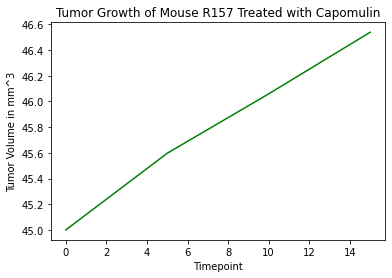

In [16]:
# Generate a line plot of tumor volume vs. time point for _A_ MOUSE treated with Capomulin

# Grab the part of the data frame that only have mice treated with Capomulin
only_capomulin = mice_clean_df.loc[mice_clean_df["Drug Regimen"] == "Capomulin", :]
# only_capomulin

# Grab the part of the data frame that only have mice treated with Capumulin
only_r157 = mice_clean_df.loc[mice_clean_df["Mouse ID"] == "r157", :]


# # Set x axis to numerical value for Timepoint
x_axis_data = only_r157['Timepoint']


# # Tumor Size
y_axis_data = only_r157['Tumor Volume (mm3)']

# # Plot the line
plt.plot(x_axis_data, y_axis_data, color="green")

# Set a Title and labels
plt.title("Tumor Growth of Mouse R157 Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume in mm^3")
plt.show()


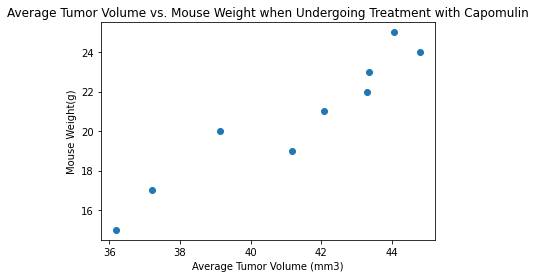

In [17]:
# Generate a scatter plot of _average_ tumor volume vs. mouse weight for the Capomulin regimen

# Grab the part of the data frame that only have mice treated with Capumulin
only_capomulin = mice_clean_df.loc[mice_clean_df["Drug Regimen"] == "Capomulin", :]
only_capomulin

#Get the average data grouped by mouse weight.
only_capomulin_mean = only_capomulin.groupby('Weight (g)').mean()

#Reset the index.
oc_reset_index = only_capomulin_mean.reset_index()

#Get the x and y variables.
only_capomulin_mean_tumor =  oc_reset_index['Tumor Volume (mm3)']
only_capomulin_mean_weight =  oc_reset_index['Weight (g)']

# Generate a scatter plot of average tumor volume vs. mouse weight
plt.scatter(only_capomulin_mean_tumor,only_capomulin_mean_weight)
plt.title("Average Tumor Volume vs. Mouse Weight when Undergoing Treatment with Capomulin")
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Mouse Weight(g)')
plt.show()



## Correlation and Regression

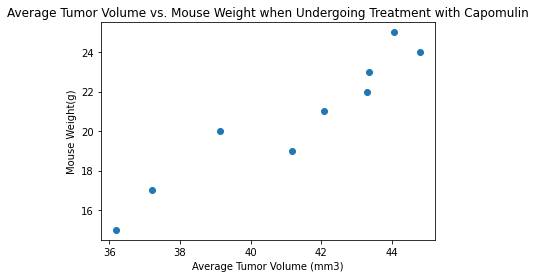

NameError: name 'stats' is not defined

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Perform a linear regression on year versus violent crime rate
mwt_slope, mwt_int, mwt_r, mwt_p, mwt_std_err = stats.linregress(only_capomulin_mean_tumor, only_capomulin_mean_weight)

# Create equation of line to calculate predicted mouse weight
mwt_fit = mwt_slope * only_capomulin_mean_tumor + mwt_int

#Find correlation coefficient
mwt_r

# Generate a scatter plot of average tumor volume vs. mouse weight
plt.scatter(only_capomulin_mean_tumor,only_capomulin_mean_weight)
plt.title("Average Tumor Volume vs. Mouse Weight when Undergoing Treatment with Capomulin")
plt.plot(only_capomulin_mean_tumor,mwt_fit,"--")
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Mouse Weight(g)')
plt.show()
